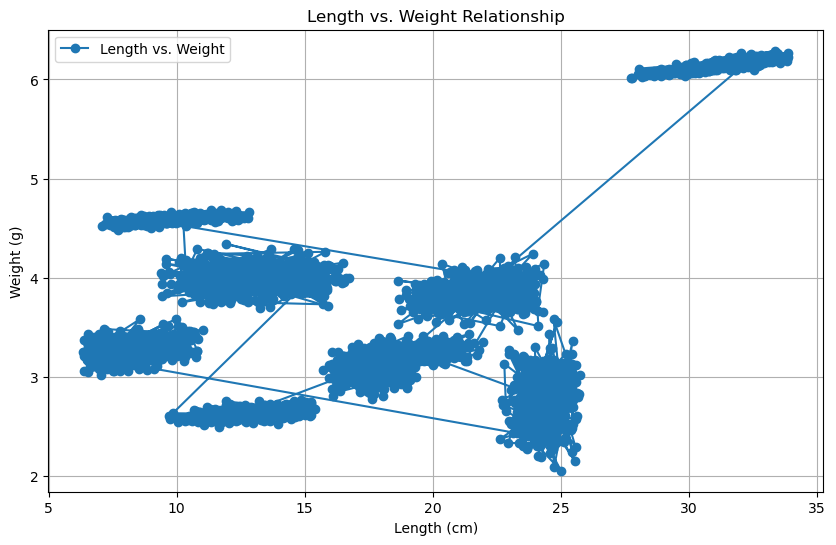

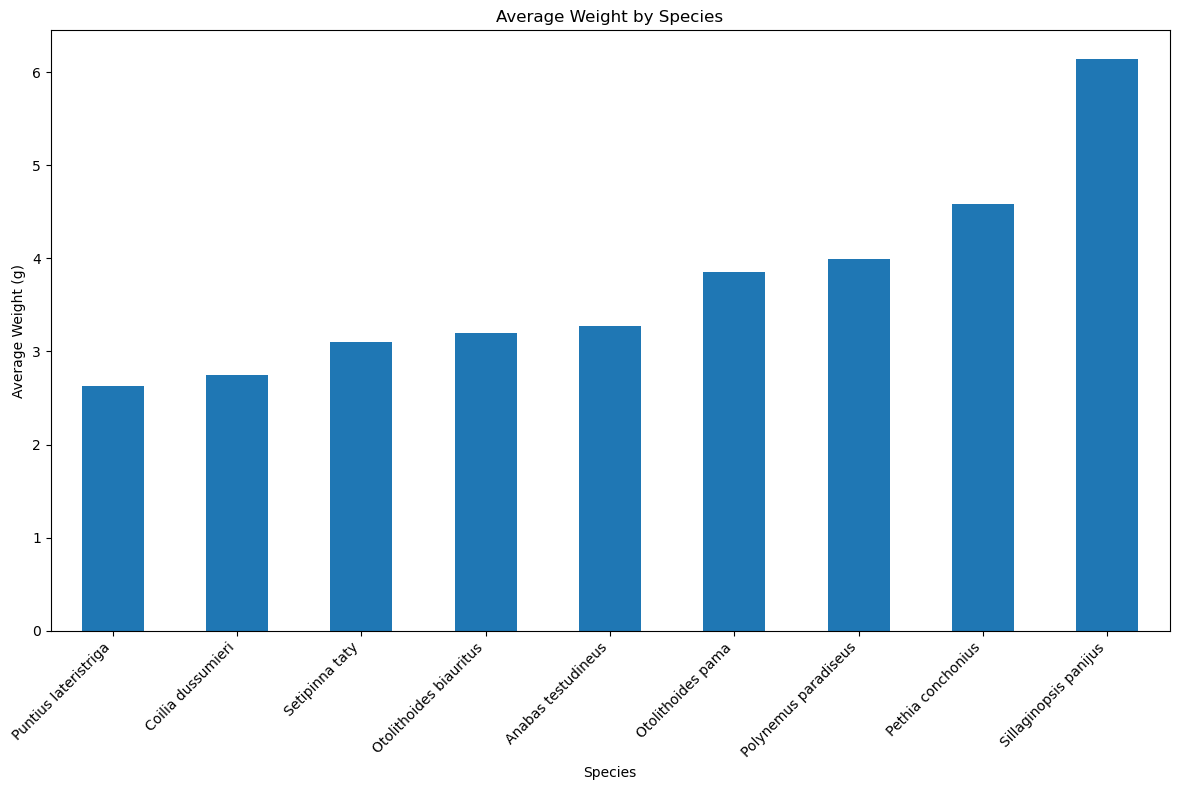

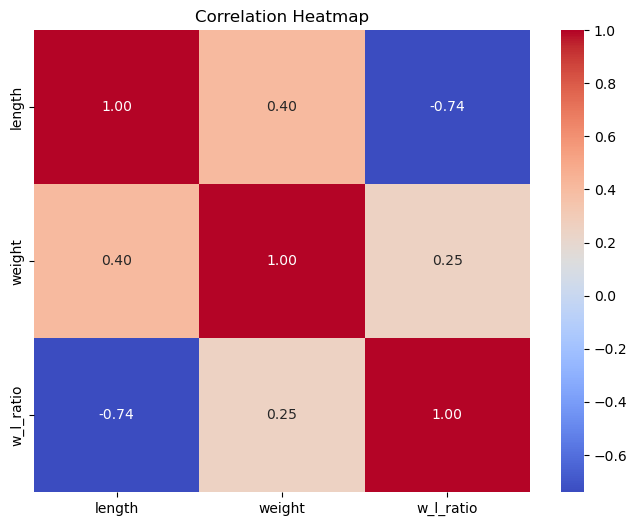

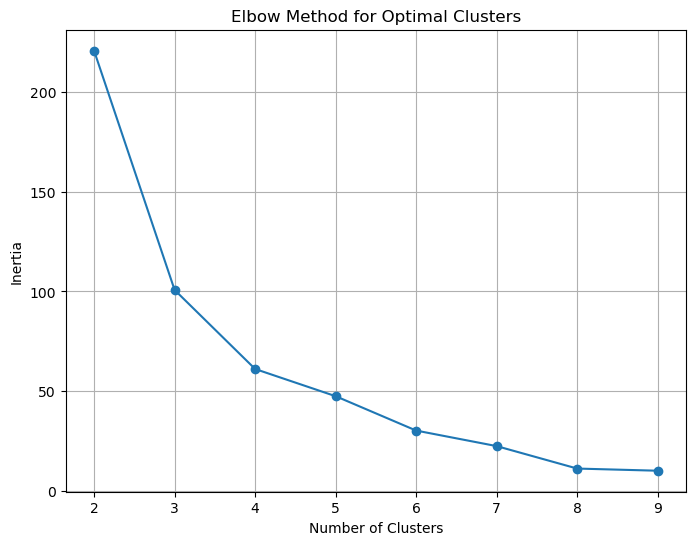

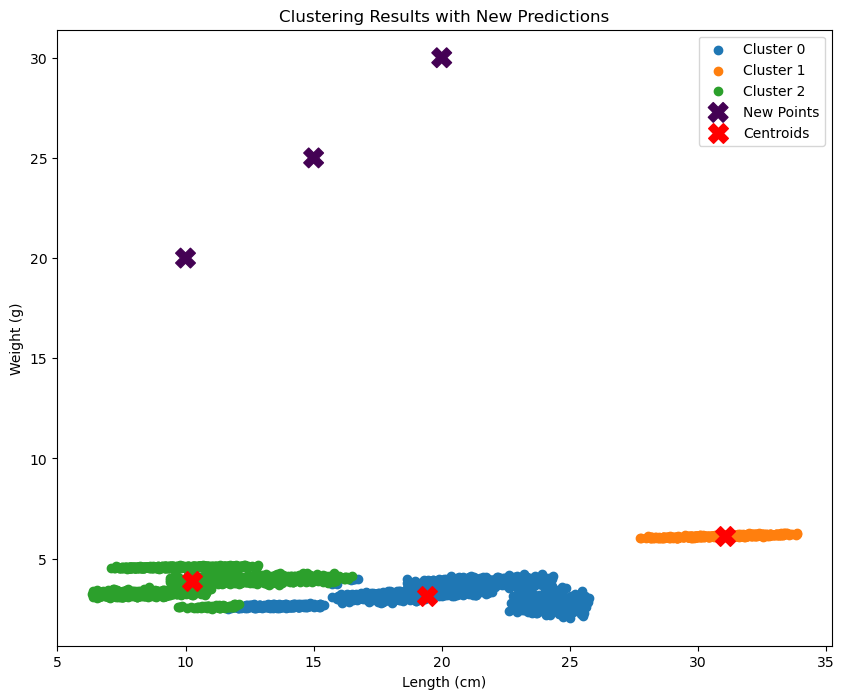

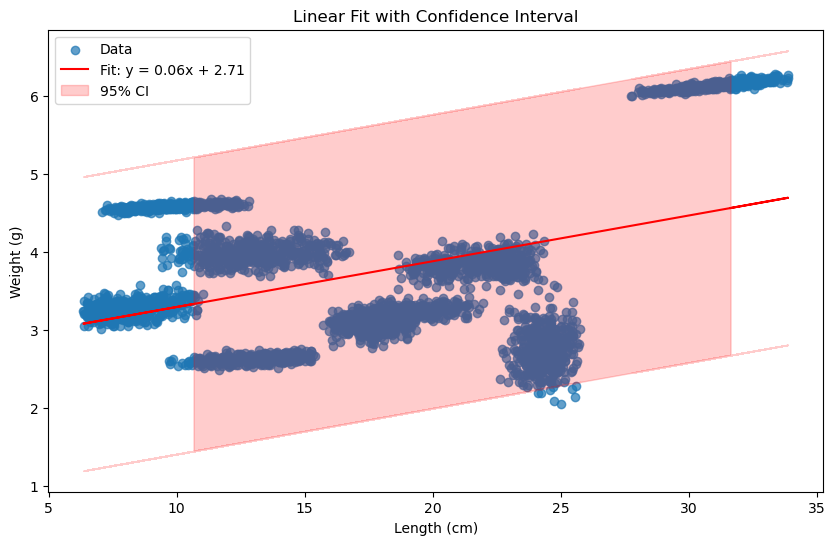

Length: 15, Predicted Weight: 3.59 ± 1.89
Length: 20, Predicted Weight: 3.89 ± 1.89
Length: 25, Predicted Weight: 4.18 ± 1.89


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from scipy.stats import linregress

def load_and_clean_data(file_path):
    """
    Load the dataset and remove duplicate rows.

    Args:
        file_path (str): Path to the dataset file.

    Returns:
        pd.DataFrame: Cleaned dataset with duplicates removed.
    """
    df = pd.read_csv(file_path)
    return df.drop_duplicates()

def plot_line_graph(df):
    """
    Create a line graph showing the relationship between length and weight.

    Args:
        df (pd.DataFrame): Dataset with 'length' and 'weight' columns.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(df['length'], df['weight'], marker='o', linestyle='-', label='Length vs. Weight')
    plt.title('Length vs. Weight Relationship')
    plt.xlabel('Length (cm)')
    plt.ylabel('Weight (g)')
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_bar_chart(df):
    """
    Create a bar chart comparing the average weight of different species.

    Args:
        df (pd.DataFrame): Dataset with 'species' and 'weight' columns.
    """
    avg_weight = df.groupby('species')['weight'].mean().sort_values()
    plt.figure(figsize=(12, 8))
    avg_weight.plot(kind='bar')
    plt.title('Average Weight by Species')
    plt.xlabel('Species')
    plt.ylabel('Average Weight (g)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_heatmap(df):
    """
    Create a heatmap to visualize correlations between numerical columns.

    Args:
        df (pd.DataFrame): Dataset with numerical columns.
    """
    corr_matrix = df[['length', 'weight', 'w_l_ratio']].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()

def perform_clustering(df):
    """
    Perform clustering, visualize results, and predict new points.

    Args:
        df (pd.DataFrame): Dataset with 'length' and 'weight' columns.

    Returns:
        KMeans: Fitted KMeans model for predicting new data points.
    """
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(df[['length', 'weight']])

    # Determine optimal clusters using elbow method
    distortions = []
    for k in range(2, 10):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data_scaled)
        distortions.append(kmeans.inertia_)

    # Elbow plot
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, 10), distortions, marker='o')
    plt.title('Elbow Method for Optimal Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

    # Fit KMeans with 3 clusters (example)
    kmeans = KMeans(n_clusters=3, random_state=42)
    df['Cluster'] = kmeans.fit_predict(data_scaled)

    # Scatter plot for clusters
    plt.figure(figsize=(10, 8))
    for cluster in np.unique(df['Cluster']):
        clustered_data = df[df['Cluster'] == cluster]
        plt.scatter(clustered_data['length'], clustered_data['weight'], label=f'Cluster {cluster}')

    # New points for prediction
    new_points = pd.DataFrame([[10, 20], [15, 25], [20, 30]], columns=['length', 'weight'])
    new_points_scaled = scaler.transform(new_points)
    new_labels = kmeans.predict(new_points_scaled)

    # Plot new points
    plt.scatter(new_points['length'], new_points['weight'], c=new_labels, marker='X', s=200, label='New Points')

    # Add cluster centers
    plt.scatter(
        scaler.inverse_transform(kmeans.cluster_centers_)[:, 0],
        scaler.inverse_transform(kmeans.cluster_centers_)[:, 1],
        s=200, c='red', marker='X', label='Centroids'
    )
    plt.title('Clustering Results with New Predictions')
    plt.xlabel('Length (cm)')
    plt.ylabel('Weight (g)')
    plt.legend()
    plt.show()

    return kmeans


    # Fit KMeans with 3 clusters (example)
    kmeans = KMeans(n_clusters=3, random_state=42)
    df['Cluster'] = kmeans.fit_predict(data_scaled)

    # Scatter plot for clusters
    plt.figure(figsize=(10, 8))
    for cluster in np.unique(df['Cluster']):
        clustered_data = df[df['Cluster'] == cluster]
        plt.scatter(clustered_data['length'], clustered_data['weight'], label=f'Cluster {cluster}')

    # New points for prediction
    new_points = np.array([[10, 20], [15, 25], [20, 30]])
    new_points_scaled = scaler.transform(new_points)
    new_labels = kmeans.predict(new_points_scaled)

    # Plot new points
    plt.scatter(new_points[:, 0], new_points[:, 1], c=new_labels, marker='X', s=200, label='New Points')

    # Add cluster centers
    plt.scatter(
        scaler.inverse_transform(kmeans.cluster_centers_)[:, 0],
        scaler.inverse_transform(kmeans.cluster_centers_)[:, 1],
        s=200, c='red', marker='X', label='Centroids'
    )
    plt.title('Clustering Results with New Predictions')
    plt.xlabel('Length (cm)')
    plt.ylabel('Weight (g)')
    plt.legend()
    plt.show()

    return kmeans

def perform_fitting(df):
    """
    Fit a linear regression model, visualize results, and predict new points with uncertainties.

    Args:
        df (pd.DataFrame): Dataset with 'length' and 'weight' columns.

    Returns:
        tuple: Slope, intercept, and prediction function for new data points.
    """
    x = df['length']
    y = df['weight']
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    y_pred = slope * x + intercept

    # Confidence interval calculation
    residuals = y - y_pred
    std_residual = np.std(residuals)

    # Visualization
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='Data', alpha=0.7)
    plt.plot(x, y_pred, color='red', label='Fit: y = {:.2f}x + {:.2f}'.format(slope, intercept))
    plt.fill_between(x, y_pred - 2 * std_residual, y_pred + 2 * std_residual, color='red', alpha=0.2, label='95% CI')
    plt.title('Linear Fit with Confidence Interval')
    plt.xlabel('Length (cm)')
    plt.ylabel('Weight (g)')
    plt.legend()
    plt.show()

    # Prediction for new points
    def predict_with_uncertainty(new_x):
        new_y_pred = slope * new_x + intercept
        uncertainty = 2 * std_residual  # Approx. 95% CI
        return new_y_pred, uncertainty

    # Example predictions
    new_x = np.array([15, 20, 25])
    new_y_pred, uncertainty = predict_with_uncertainty(new_x)
    for i, x_val in enumerate(new_x):
        print(f"Length: {x_val}, Predicted Weight: {new_y_pred[i]:.2f} ± {uncertainty:.2f}")

    return slope, intercept, predict_with_uncertainty


file_path = "fish_data.csv" 
data_cleaned = load_and_clean_data(file_path)

plot_line_graph(data_cleaned)
plot_bar_chart(data_cleaned)
plot_heatmap(data_cleaned)
kmeans_model = perform_clustering(data_cleaned)
slope, intercept, predict_with_uncertainty = perform_fitting(data_cleaned)

